# Chapter 1: Supervised Learning

In [20]:
%pip install matplotlib

  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 2.2 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.7 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.4 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.4 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.4 MB/s eta 0:00:05
   --------------- ------------------------ 3.1/8.1 MB 1.4 MB/s eta 0:00:04
   --------------- ------------------------

In [13]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install pandas scikit-learn

  Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.4.2-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl (9.7 MB)
Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached numpy-2.4.2-cp313-cp313-win_amd64.whl (12.3 MB)
Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl (36.3 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)

   ---------------------------------------- 0/7 [tzdata]
   -------------------------------

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# 1. Load the data (Make sure the CSV file is in the same folder as your notebook)
# Replace 'telecom_churn.csv' with the actual filename you downloaded
churn_df = pd.read_csv('telecom_churn_clean.csv') 

# 2. Extract features and target (The code from your image)
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

print(f"X shape: {X.shape}, y shape: {y.shape}")

# 3. Initialize and Fit the model (The next logical steps)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

print("Model fitted successfully!")

X shape: (3333, 2), y shape: (3333,)
Model fitted successfully!


## K-Nearest Neighbors: Predict

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

In [16]:
import numpy as np
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 1]


## Accuracy: Measuring Model Performance 

accuracy = correct predictions / total observations

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))


0.872


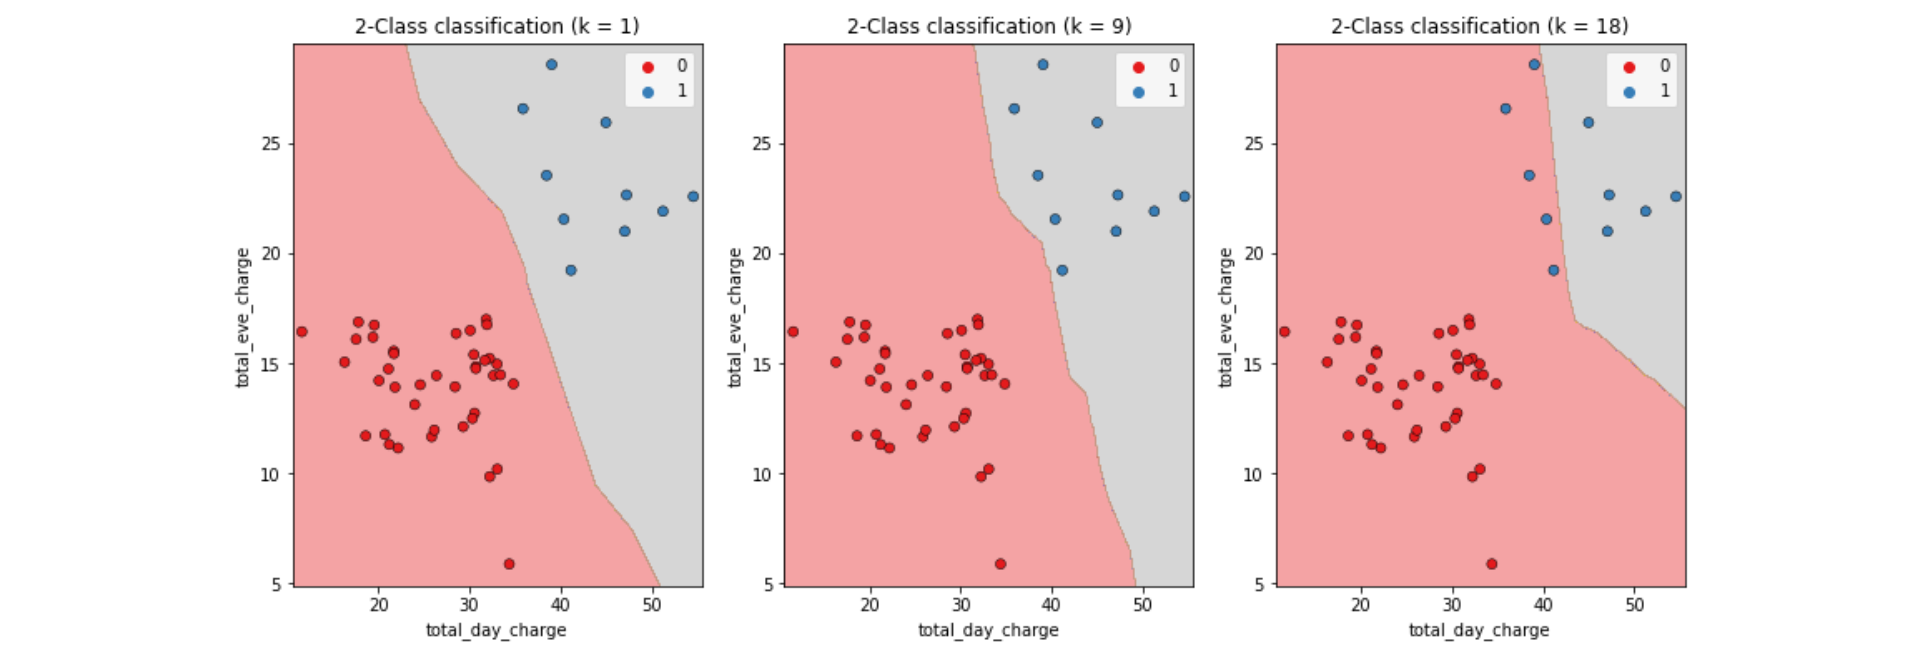

## Model complexity and Under / Over Fitting

In [22]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    


### Plotting Result

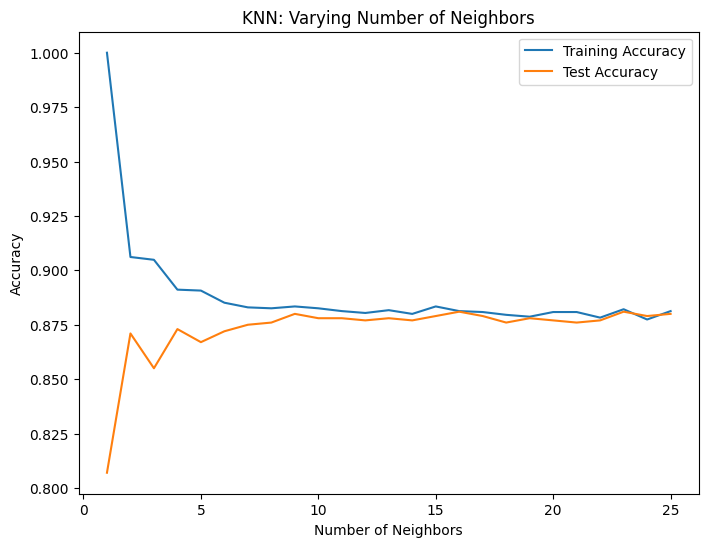

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()



# Chapter 2: Regression